In [5]:
import numpy as np
import mpmath as mp
import random as rand
import pandas as pd
import matplotlib.pyplot as plt
from random_geometry_points.plane import Plane   ### PAra instalar utilizar "pip install random-geometry-points"
from funciones_Sim_ab_initio import *

from mpl_toolkits.mplot3d import Axes3D



In [7]:
###### Definiciones y dominios #######
Phi = np.arange(0, 2 * np.pi, 0.001)
Radio = 100
Theta = np.arange(0, np.pi/2, 0.001)    ### Semi-esfera de radio 100 unidades

long_a = np.arange(0, 10, 0.001)
long_b = np.arange(0, 10, 0.001)

Theta_true = dis_angular(Theta) ## Distribución angular theta real.


Número de planos:  1571
Número de puntos por plano:  10
Número total de eventos simulados:  15710


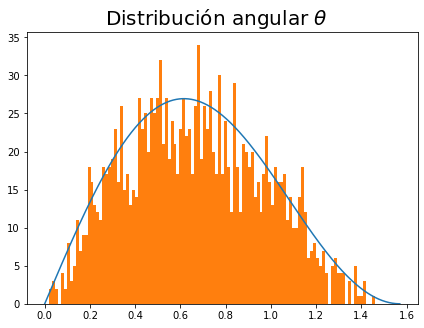

In [8]:
list_random_th = []
list_random_phi = []
list_points_per_plane = []
Vectors = []
Points = []

for i in np.arange(0,len(Theta)):
    list_random_plane_point = []
    Random_th = rand.choices(Theta, Theta_true) ## Escoje un ángulo segun la distribución de Theta_true
    list_random_th.append(Random_th)    ## Lo anexa en una lista

    Random_phi = rand.choice(Phi)   ## Lo mismo pero con phi
    list_random_phi.append(Random_phi)

    # Point = Radio * [ np.sin(Random_th) * np.cos(Random_phi), np.sin(Random_th) * np.sin(Random_phi), np.cos(Random_th)]
    Vec = coord_cartesian(Random_th, Random_phi)
    # print(type(Vec[0]))
    Point = (Radio * Vec[0], Radio * Vec[1], Radio * Vec[2])  ## Genera un punto sobre la esfera.
    Points.append(Point)

    normal_Vec = (-1 * Vec[0], -1 * Vec[1], -1 * Vec[2])     ## Es un vector apuntando hacia el centro de coordenadas
    # print(len(normal_Vec))
    Vectors.append(normal_Vec)

    # plane = Plane(normal_vec = Vec, d_origin = Radio, ref_point = Point, radius = 10.0)   ## Se crea el plano sobre la esfera
    vec_thet = [np.cos(Random_th) * np.cos(Random_phi), np.cos(Random_th) * np.sin(Random_phi), np.sin(Random_th)]
    vec_phi = [-np.sin(Random_phi), np.cos(Random_phi), 0]

    for i in np.arange(0,10):
        # random_plane_point = plane.create_random_points(1)   ## Selección aleatoria de un punto sobre el plano
        # list_random_plane_point.append(random_plane_point)
        random_a = rand.choice(long_a)
        random_b = rand.choice(long_b)
        P_vector = [random_a * vec_thet[0] + random_b * vec_phi[0], random_a * vec_thet[1] + random_b * vec_phi[1], random_a * vec_thet[2] + random_b * vec_phi[2]]

        random_plane_point = [Point[0] + P_vector[0], Point[1] + P_vector[1], Point[2] + P_vector[2]]
        list_random_plane_point.append(random_plane_point)

    list_points_per_plane.append(list_random_plane_point)

random_th_array = np.array(list_random_th)
random_phi_array = np.array(list_random_phi)
# type(Random_th)
# len(Random_th)
# Random_th

fig, axs = plt.subplots(figsize=[7,5])

# Theta
axs.plot(Theta, 70 * Theta_true)
# plt.plot(Theta_true, Theta)
# plt.plot(list_random_th, Theta, '.')
# plt.plot(Theta_true, list_random_th, '.')

axs.hist(random_th_array, bins = 110)
fig.suptitle(r'Distribución angular $\theta$', y = 0.95, size = 20)


## Phi 
# plt.hist(random_phi_array, bins = 20)
print('Número de planos: ', len(Theta))
print('Número de puntos por plano: ', len(list_points_per_plane[0]))
print('Número total de eventos simulados: ', len(Theta) * len(list_points_per_plane[0]))

plt.show()

/tmp/ipykernel_5586/715259870.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  Ax = Axes3D(fig)


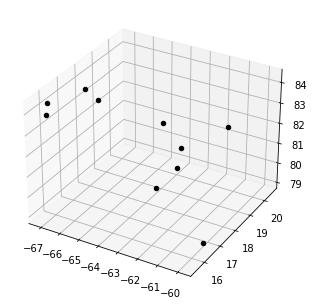

In [10]:
fig = plt.figure()
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')
Ax = Axes3D(fig)

theta = np.arange(0, 2 * np.pi, 0.01)
phi = np.arange(0, np.pi/2, 0.01)
theta, phi = np.meshgrid(theta, phi)

# Definimos los datos de prueba
for i in np.arange(0, len(list_points_per_plane[0])):
    x = list_points_per_plane[0][i][0]
    y = list_points_per_plane[0][i][1]
    z = list_points_per_plane[0][i][2]
    # print(list_points_per_plane[0][i][0])
    Ax.scatter(x, y, z, c='k', marker='o')

x_s = Radio * np.sin(phi) * np.cos(theta)
y_s = Radio * np.sin(phi) * np.sin(theta)
z_s = Radio * np.cos(phi)

# Agregamos los puntos en el plano 3D

ax1.plot_surface(x_s, y_s, z_s)

# Mostramos el gráfico
plt.show()


Coordenadas de un punto:  [[(-66.42468627239163, -16.451798687867427, 73.45785154906528)], [(-60.26630990950633, -22.35271884742817, 76.61053175295828)], [(-61.68762406581528, -21.55358526376747, 75.72545104421212)], [(-61.74934936275447, -27.336396882366863, 74.05925657239479)], [(-59.44342574778086, -20.70782071178821, 77.71266042453823)], [(-59.845698349353256, -20.573250075700198, 77.43652534203726)], [(-60.67166564300068, -16.580076239570566, 77.90953949669833)], [(-58.135708277609226, -15.808206513270916, 80.10365633511542)], [(-67.33165514832618, -17.747886073285134, 72.38773171411975)], [(-57.25493781017444, -24.015363743479888, 78.49430683936394)]]


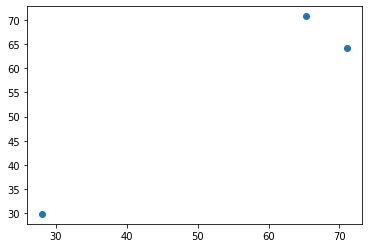

In [5]:
print('Coordenadas de un punto: ', list_points_per_plane[0])
plt.scatter(list_random_plane_point[0], list_random_plane_point[1])

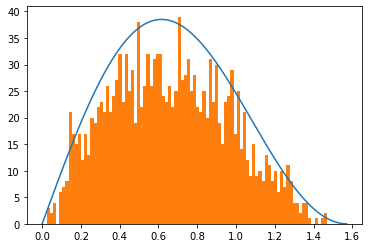

In [68]:
plt.plot(Theta, Theta_true)
# plt.plot(Theta_true, Theta)
# plt.plot(list_random_th, Theta, '.')
# plt.plot(Theta_true, list_random_th, '.')

plt.hist(List_random_th_array, bins = 90)
plt.show()